In [1]:
using AutomotiveDrivingModels
"loading modules"

INFO: Recompiling stale cache file /home/tim/.julia/lib/v0.4/AutomotiveDrivingModels.ji for module AutomotiveDrivingModels.
INFO: Recompiling stale cache file /home/tim/.julia/lib/v0.4/StreamStats.ji for module StreamStats.
  likely near /home/tim/.julia/v0.4/StreamStats/src/hyper_log_log.jl:7
  likely near /home/tim/.julia/v0.4/StreamStats/src/hyper_log_log.jl:9
  likely near /home/tim/.julia/v0.4/StreamStats/src/hyper_log_log.jl:21
  likely near /home/tim/.julia/v0.4/StreamStats/src/hyper_log_log.jl:21
  likely near /home/tim/.julia/v0.4/StreamStats/src/hyper_log_log.jl:21
  likely near /home/tim/.julia/v0.4/StreamStats/src/hyper_log_log.jl:21
  likely near /home/tim/.julia/v0.4/StreamStats/src/hyper_log_log.jl:21
  likely near /home/tim/.julia/v0.4/StreamStats/src/hyper_log_log.jl:21
  likely near /home/tim/.julia/v0.4/StreamStats/src/hyper_log_log.jl:21
  likely near /home/tim/.julia/v0.4/StreamStats/src/hyper_log_log.jl:21


"loading modules"

# Rendering

In [2]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "Renderer.jl")); using .Renderer
include(Pkg.dir("AutomotiveDrivingModels", "viz", "ColorScheme.jl")); using .ColorScheme

In [3]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "incl_cairo_utils.jl"))
# reload("/home/tim/Documents/wheelerworkspace/Bosch/viz/incl_pyplot_utils.jl")

# Select Street Network

In [4]:
const STREETMAP_DIR = "/media/tim/DATAPART1/Data/Bosch/processed/streetmaps"
streetmap_files = filter(readdir(STREETMAP_DIR)) do content
    path = joinpath(STREETMAP_DIR,content)
    isfile(path) && endswith(content, ".jld")
end
println("available streetnetworks:")
streetmap_files

available streetnetworks:


12-element Array{ByteString,1}:
 "streetmap_280N_big.jld"                  
 "streetmap_280_pagemill_to_92.jld"        
 "streetmap_280_pagemill_to_92_old.jld"    
 "streetmap_280S_big.jld"                  
 "streetmap_circuit_2lane.jld"             
 "streetmap_detroit_v4.jld"                
 "streetmap_highway_1lane.jld"             
 "streetmap_highway_2lane.jld"             
 "streetmap_highway_3lane.jld"             
 "streetmap_highway_4lane.jld"             
 "streetmap_its_both_loops_v3_smoothed.jld"
 "streetmap_its_inner_loop_v1_2.jld"       

# Select CSV File

In [5]:
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-14-14-39-22_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-14-15-04-57_92_to_pagemill_manual_drive_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-22-13-50-09_280N_manual_drive_lane_changes_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source5/2015-12-22-14-05-41_280S_manual_drive_lane_changes_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/source4/2015-02-05-14-03-40_driving_style_data_martin-raw.csv"

# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/philippruns_20160223/manual_2016-02-23-15-07-30_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/philippruns_20160223/manual2_2016-02-23-15-42-56_planning_stripped-raw.csv"
# csv_filepath = "/media/tim/DATAPART1/Data/Bosch/philippruns_20160223/manual2_2016-02-23-15-55-53_planning_stripped-raw.csv"

csv_filepath = "/media/tim/DATAPART1/Data/Bosch/runs_201605/2016-05-06-14-49-24-raw.csv"

"/media/tim/DATAPART1/Data/Bosch/runs_201605/2016-05-06-14-49-24-raw.csv"

In [13]:
header, trajdata, sn = load_header_trajdata_and_streetmap(csv_filepath)
extract_params = PrimaryDataExtractionParams()
"done"

"done"

Interact.Slider{Int64}(Signal{Int64}(5456, nactions=0),"frame",5456,1:10911,true)

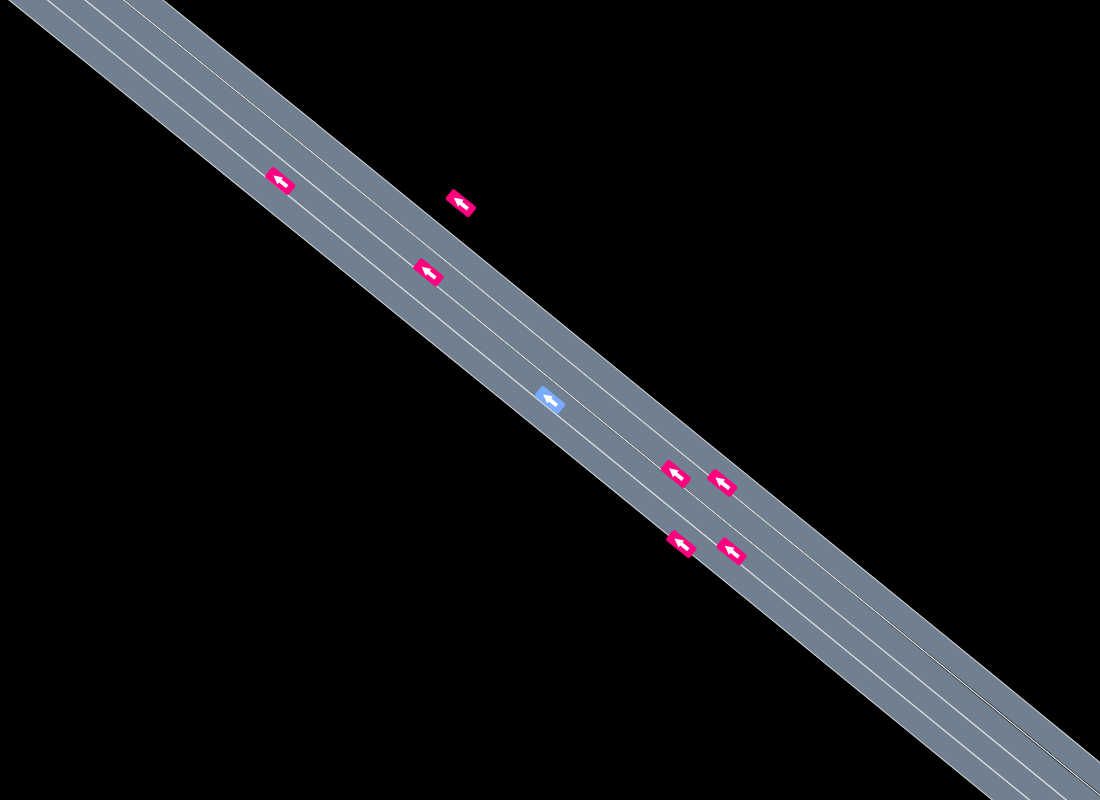

In [14]:
plot_manipulable_trajdata(trajdata, sn, canvas_height=800)

In [ ]:
tic()
extract_params.threshold_percent_outliers_error = 20.0
runlogs = extract_runlogs(trajdata, sn, extract_params, header)
toc()
sleep(0.1)

In [ ]:
length(runlogs)

In [ ]:
include(Pkg.dir("AutomotiveDrivingModels", "viz", "incl_cairo_utils.jl"))
overlays = Overlay[]

push!(overlays, TextStatsOverlay())
# push!(overlays, TrajdataOverlay(trajdata))
# push!(overlays, EgoToLeftCarOverlay())
push!(overlays, EgoToRearCarOverlay())

plot_manipulable_runlog(runlogs[1], sn, RunLogs.ID_EGO, canvas_height=600, overlays=overlays)

In [ ]:
# include(Pkg.dir("AutomotiveDrivingModels", "viz", "incl_cairo_utils.jl"))
# frames = reel_runlog(runlogs[1], sn, frames=1:100, overlays=overlays)
# roll(frames, fps=40)

In [ ]:
# frames = 2779:2780
# the_values = collect(repeated(ContextClass.FREEFLOW, length(frames)))
# RunLogs.set!(runlogs[1], ID_EGO, frames, :behavior, the_values);